In [ ]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

**Q1. Twitter Sentiment Analysis- A NLP Use-Case for Beginners**


Dataset download link : Sentiment140 dataset with 1.6 million tweets: https://www.kaggle.com/datasets/kazanova/sentiment140 

In [ ]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('/content/drive/MyDrive/training.1600000.processed.noemoticon.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)


,target,ids,date,flag,user,text
677278,0,2248640177,Fri Jun 19 20:56:52 PDT 2009,NO_QUERY,jaydeepop714,Fucking year one needs to start soon I hate th...
282596,0,1992667747,Mon Jun 01 09:07:43 PDT 2009,NO_QUERY,x3MaryJane,but we are two worlds apart can't reach to ur ...
910443,4,1751607466,Sat May 09 19:50:54 PDT 2009,NO_QUERY,rofllaurennn,@jackalltimelow lucky! that's awesome
71781,0,1694052517,Mon May 04 00:52:22 PDT 2009,NO_QUERY,iammandurr,@musicmuch whaaat really? that is funny. sorry...
1415802,4,2057297262,Sat Jun 06 12:44:24 PDT 2009,NO_QUERY,patitjocson,has an extended vacation. yipee.


In [ ]:
# first 5 rows
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# columns of the dataset
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [ ]:
#length of the dataset
len(df)

1600000

In [ ]:
# shape of the dataset
df.shape

(1600000, 6)

In [ ]:
# informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
# data types of the dataset
df.dtypes


target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

In [ ]:
# check for null values
df.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [ ]:
# rows and columns of the dataset
print('Count of columns in the data is: ', len(df.columns))
print('Count of rows in the data is: ', len(df))

Count of columns in the data is:  6
Count of rows in the data is:  1600000


In [ ]:
# check unique target values
df['target'].unique()

array([0, 4])

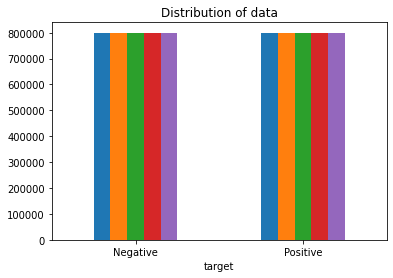

In [ ]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

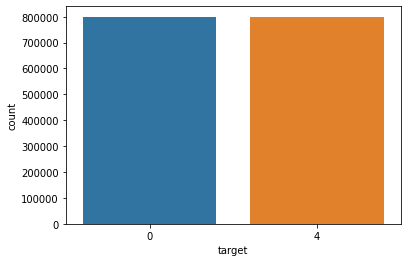

In [ ]:
sns.countplot(x='target', data=df)

In [ ]:
# electing the text and Target column for our further analysis
data=df[['text','target']]

In [ ]:
# Replacing the values to ease understanding. (Assigning 1 to Positive sentiment 4)
data['target'] = data['target'].replace(4,1)

<ipython-input-48-3a16057e415e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [ ]:
# Print unique values of target variables
data['target'].unique()

array([0, 1])

In [ ]:
# Separating positive and negative tweets
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [ ]:
# taking one fourth data so we can run on our machine easily
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [ ]:
# combining positive and negative tweets
dataset = pd.concat([data_pos, data_neg])

In [ ]:
# Making statement text in lower case
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

19995    not much time off this weekend, work trip to m...
19996                            one more day of holidays 
19997    feeling so down right now .. i hate you damn h...
19998    geez,i hv to read the whole book of personalit...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

In [ ]:
# Defining set containing all stopwords in English.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
 'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
 'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
 'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
 'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
 'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
 'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
 'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
 't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
 'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
 'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
 'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
 'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
 "youve", 'your', 'yours', 'yourself', 'yourselves']


In [ ]:
# Cleaning and removing the above stop words list from the tweet text
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
 return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [ ]:
# Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
 translator = str.maketrans('', '', punctuations_list)
 return text.translate(translator)
 
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [ ]:
# Cleaning and removing repeating characters
def cleaning_repeating_char(text):
 return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [ ]:
# Cleaning and removing URL’s
def cleaning_URLs(data):
 return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [ ]:
# Cleaning and removing Numeric numbers
def cleaning_numbers(data):
 return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [ ]:
# Getting tokenization of tweet text
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

In [ ]:
# Applying Stemming
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
 text = [st.stem(word) for word in data]
 return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

In [ ]:
# Applying Lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
  text = [lm.lemmatize(word) for word in data]
  return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

In [ ]:
# Separating input feature and label
X=data.text
y=data.target

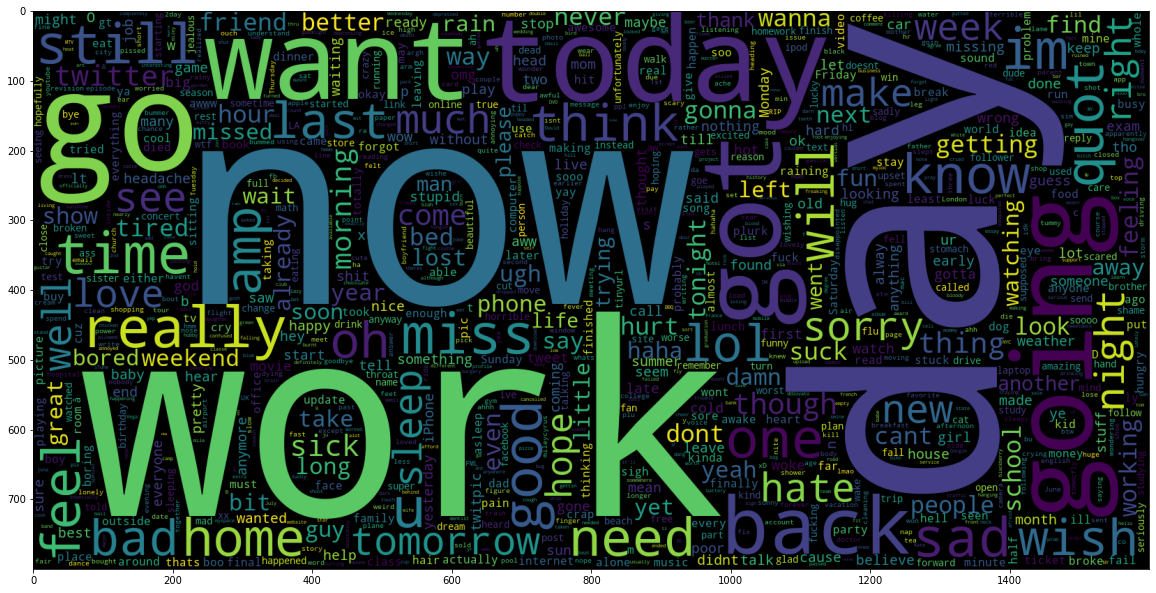

In [ ]:
# Plot a cloud of words for negative tweets
data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
 collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)


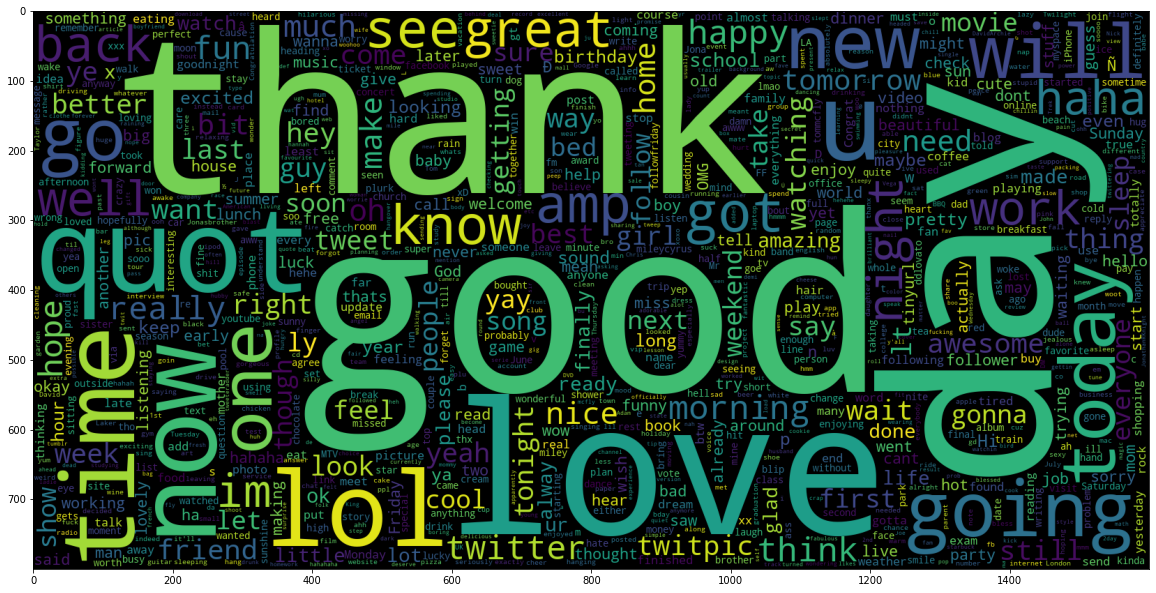

In [ ]:
# Plot a cloud of words for positive tweets
data_pos = data['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
 collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [ ]:
 #Splitting our data into Train and Test Subset
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [ ]:
# Fit the TF-IDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No. of feature_words:  500000


In [ ]:
# Transform the data using TF-IDF Vectorizer
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)

In [ ]:
# Function For Model Evaluation

def model_Evaluate(model):
  # Predict values for Test dataset
 y_pred = model.predict(X_test)
 # Print the evaluation metrics for the dataset.
 print(classification_report(y_test, y_pred))
 # Compute and plot the Confusion matrix
 cf_matrix = confusion_matrix(y_test, y_pred)
 categories = ['Negative','Positive']
 group_names = ['True Neg','False Pos', 'False Neg','True Pos']
 group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
 labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
 labels = np.asarray(labels).reshape(2,2)
 sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
 xticklabels = categories, yticklabels = categories)
 plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
 plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
 plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


              precision    recall  f1-score   support

           0       0.81      0.79      0.80     40100
           1       0.80      0.81      0.80     39900

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



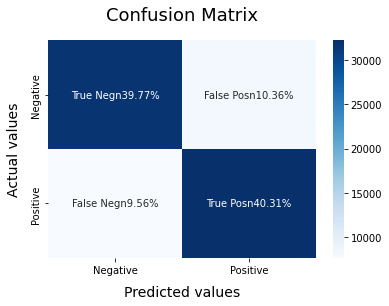

In [ ]:
# Model-1
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

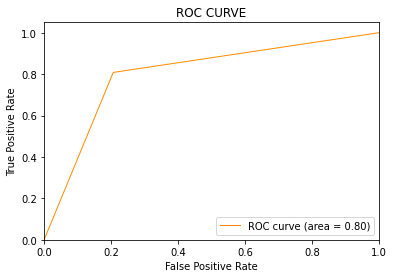

In [ ]:
# Plot the ROC-AUC Curve for model-1
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     40100
           1       0.81      0.82      0.82     39900

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



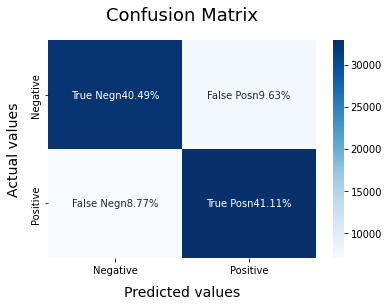

In [ ]:
# Model-2:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

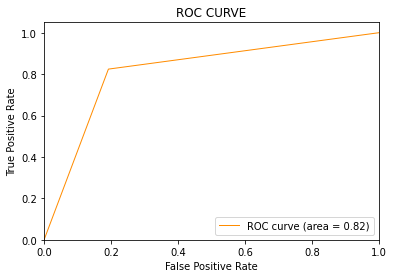

In [ ]:
# Plot the ROC-AUC Curve for model-2
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     40100
           1       0.82      0.84      0.83     39900

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



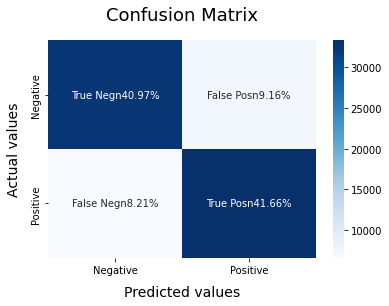

In [ ]:
# Model-3:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

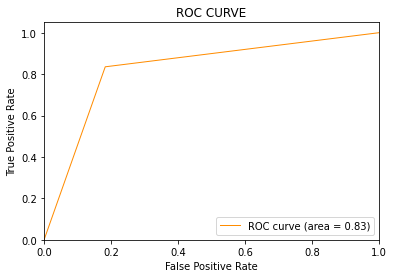

In [ ]:
# Plot the ROC-AUC Curve for model-3
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

**Q2. Sentiment Analysis of IMDB Movie Reviews**





Dataset Download Link : Sentiment Analysis of IMDB Movie Reviews: https://www.kaggle.com/code/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews/data

In [ ]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
#importing the training data
imdb_data=pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
#Summary of the dataset
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
#sentiment count
imdb_data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
# split the dataset 
#train dataset
train_reviews=imdb_data.review[:40000]
train_sentiments=imdb_data.sentiment[:40000]
#test dataset
test_reviews=imdb_data.review[40000:]
test_sentiments=imdb_data.sentiment[40000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


In [ ]:
#Tokenization of text
nltk.download('stopwords')
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Removing the html strips
def strip_html(text):
  soup = BeautifulSoup(text, "html.parser")
  return soup.get_text()

# Removing the square brackets
def remove_between_square_brackets(text):
 return re.sub('\[[^]]*\]', '', text)
#Removing the noisy text
def denoise_text(text):
 text = strip_html(text)
 text = remove_between_square_brackets(text)
 return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(denoise_text)



In [ ]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
 pattern=r'[^a-zA-z0-9\s]'
 text=re.sub(pattern,'',text)
 return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)


In [ ]:
#Stemming the text
def simple_stemmer(text):
 ps=nltk.porter.PorterStemmer()
 text= ' '.join([ps.stem(word) for word in text.split()])
 return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(simple_stemmer)


In [ ]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)


#removing the stopwords
def remove_stopwords(text, is_lower_case=False):

  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
  if is_lower_case:
   filtered_tokens = [token for token in tokens if token not in stopword_list]
  else:
   filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]

   filtered_text=' '.join(filtered_tokens)

   return filtered_text

#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)


  













{'yours', 'until', 'any', "it's", 'nor', 'yourself', 'theirs', 'needn', 'why', 'weren', 'were', 'will', "hadn't", 'there', 'hadn', "weren't", 'such', 'o', 'hers', 'then', 't', 'an', 'for', 're', 'them', 'him', 'against', 'too', 'am', 'to', 'a', 'of', 'itself', 'mustn', 'myself', "shouldn't", 'our', 'yourselves', 'most', "you'd", 'don', 'being', "needn't", 'not', 'should', "mustn't", 'because', "won't", 'out', 'through', 'than', "you'll", 'have', "wasn't", 'do', 'both', 'it', 'themselves', "hasn't", 'very', 'down', 'how', 'between', 'ain', 'further', 'below', "mightn't", 'they', 'that', 'over', 'couldn', 'wouldn', 'more', 'but', 'while', "she's", 've', 'each', 'so', 'd', 'her', 'again', 'are', "couldn't", 'whom', 'he', 'its', 'been', 'all', 'ours', 'few', 'with', 'aren', 'now', 'this', 'at', 'off', 'which', 'is', 'didn', 'was', 'into', 'did', "should've", 'under', 'other', "doesn't", 'me', 'haven', 'his', 'y', 'those', "isn't", 'i', 'doing', 'had', 'or', 'my', 'shouldn', 'she', "didn't"

In [ ]:
#normalized train reviews
norm_train_reviews=imdb_data.review[:40000]
norm_train_reviews[0]

'one review ha mention watch 1 oz episod youll hook right thi exactli happen meth first thing struck oz wa brutal unflinch scene violenc set right word go trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison exp

In [ ]:
#Normalized test reviews
norm_test_reviews=imdb_data.review[40000:]
norm_test_reviews[45005]


'read review watch thi piec cinemat garbag took least 2 page find somebodi els didnt think thi appallingli unfunni montag wasnt acm humour 70 inde ani era thi isnt least funni set sketch comedi ive ever seen itll till come along half skit alreadi done infinit better act monti python woodi allen wa say nice piec anim last 90 second highlight thi film would still get close sum mindless drivelridden thi wast 75 minut semin comedi onli world semin realli doe mean semen scatolog humour onli world scat actual fece precursor joke onli mean thi handbook comedi tit bum odd beaver niceif pubesc boy least one hand free havent found playboy exist give break becaus wa earli 70 way sketch comedi go back least ten year prior onli way could even forgiv thi film even made wa gunpoint retro hardli sketch clown subtli pervert children may cut edg circl could actual funni come realli quit sad kept go throughout entir 75 minut sheer belief may save genuin funni skit end gave film 1 becaus wa lower scoreand

In [ ]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)
print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (40000, 6209089)
BOW_cv_test: (10000, 6209089)


In [ ]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6209089)
Tfidf_test: (10000, 6209089)


In [ ]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(imdb_data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


In [ ]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=500, random_state=42)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=500, random_state=42)


In [ ]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


In [ ]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.7512
lr_tfidf_score : 0.75


In [ ]:
#Classification report for bag of words 
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)
#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.75      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.74      0.77      0.75      4993
    Negative       0.76      0.73      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [ ]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3768 1239]
 [1249 3744]]
[[3663 1344]
 [1156 3837]]


In [ ]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)
#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(max_iter=500, random_state=42)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(max_iter=500, random_state=42)


In [ ]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)
#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[1 1 0 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [ ]:
# Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.5829
svm_tfidf_score : 0.5112


In [ ]:
#Classification report for bag of words 
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Classification report for tfidf features
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.94      0.18      0.30      4993
    Negative       0.55      0.99      0.70      5007

    accuracy                           0.58     10000
   macro avg       0.74      0.58      0.50     10000
weighted avg       0.74      0.58      0.50     10000

              precision    recall  f1-score   support

    Positive       1.00      0.02      0.04      4993
    Negative       0.51      1.00      0.67      5007

    accuracy                           0.51     10000
   macro avg       0.75      0.51      0.36     10000
weighted avg       0.75      0.51      0.36     10000



In [ ]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)


[[4948   59]
 [4112  881]]
[[5007    0]
 [4888  105]]


In [ ]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


In [ ]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


In [ ]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)


mnb_bow_score : 0.751
mnb_tfidf_score : 0.7509


In [ ]:
#Classification report for bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.74      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [ ]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3736 1271]
 [1219 3774]]
[[3729 1278]
 [1213 3780]]


<function matplotlib.pyplot.show(*args, **kw)>

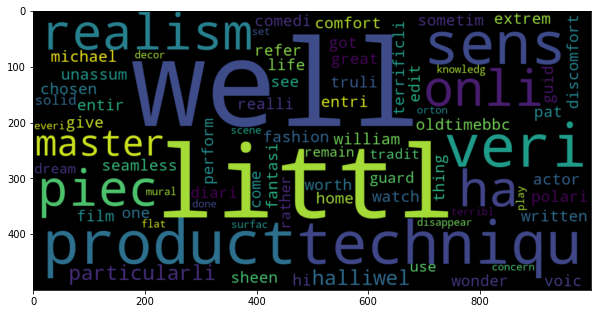

In [ ]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

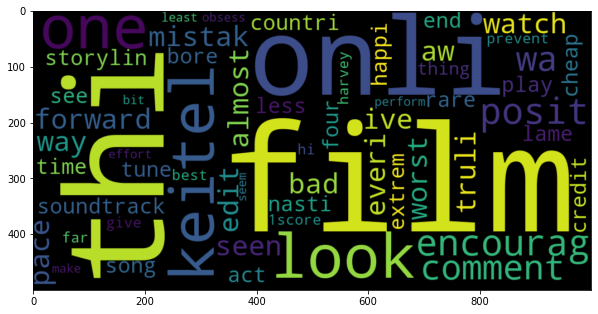

In [ ]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show


**Q3. Sentiment Analysis of Movie Reviews in NLTK Python (A gentle introduction to sentiment analysis)**


In [ ]:
import nltk
from nltk.corpus import movie_reviews

In [ ]:
# A list of all the words in 'movie_reviews'
nltk.download('movie_reviews')
movie_reviews.words()

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]

In [ ]:
# Prints total number of words in 'movie_reviews'
len(movie_reviews.words())

1583820

In [ ]:
# Categories
movie_reviews.categories()

['neg', 'pos']

In [ ]:
# Displays frequency of words in ‘movie_reviews’
nltk.FreqDist(movie_reviews.words())

FreqDist({',': 77717, 'the': 76529, '.': 65876, 'a': 38106, 'and': 35576, 'of': 34123, 'to': 31937, "'": 30585, 'is': 25195, 'in': 21822, ...})

In [ ]:
# Prints frequency of the word 'happy'.
nltk.FreqDist(movie_reviews.words())['happy']

215

In [ ]:
# Displays frequency of 15 most common words in ‘movie_reviews’
nltk.FreqDist(movie_reviews.words()).most_common(15)

[(',', 77717),
 ('the', 76529),
 ('.', 65876),
 ('a', 38106),
 ('and', 35576),
 ('of', 34123),
 ('to', 31937),
 ("'", 30585),
 ('is', 25195),
 ('in', 21822),
 ('s', 18513),
 ('"', 17612),
 ('it', 16107),
 ('that', 15924),
 ('-', 15595)]

In [ ]:
# Prints all file ids
movie_reviews.fileids()
# Prints file ids of positive reviews
movie_reviews.fileids('pos')
# Prints file ids of negative reviews.
movie_reviews.fileids('neg')

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt',
 'neg/cv005_29357.txt',
 'neg/cv006_17022.txt',
 'neg/cv007_4992.txt',
 'neg/cv008_29326.txt',
 'neg/cv009_29417.txt',
 'neg/cv010_29063.txt',
 'neg/cv011_13044.txt',
 'neg/cv012_29411.txt',
 'neg/cv013_10494.txt',
 'neg/cv014_15600.txt',
 'neg/cv015_29356.txt',
 'neg/cv016_4348.txt',
 'neg/cv017_23487.txt',
 'neg/cv018_21672.txt',
 'neg/cv019_16117.txt',
 'neg/cv020_9234.txt',
 'neg/cv021_17313.txt',
 'neg/cv022_14227.txt',
 'neg/cv023_13847.txt',
 'neg/cv024_7033.txt',
 'neg/cv025_29825.txt',
 'neg/cv026_29229.txt',
 'neg/cv027_26270.txt',
 'neg/cv028_26964.txt',
 'neg/cv029_19943.txt',
 'neg/cv030_22893.txt',
 'neg/cv031_19540.txt',
 'neg/cv032_23718.txt',
 'neg/cv033_25680.txt',
 'neg/cv034_29446.txt',
 'neg/cv035_3343.txt',
 'neg/cv036_18385.txt',
 'neg/cv037_19798.txt',
 'neg/cv038_9781.txt',
 'neg/cv039_5963.txt',
 'neg/cv040_8829.txt',
 'neg/cv041_22364.txt',


In [ ]:

# Prints all words in movie_review with file id ‘neg/cv001_19502.txt’
movie_reviews.words('neg/cv001_19502.txt')

['the', 'happy', 'bastard', "'", 's', 'quick', 'movie', ...]

In [ ]:
# all_words is a dictionary which contains the frequency of words in ‘movie_reviews’
all_words = nltk.FreqDist(movie_reviews.words())

In [ ]:
# Defining the feature_vector
feature_vector = list(all_words)[:400]

In [ ]:
# Initialization
feature = {}
# One movie review is chosen
review = movie_reviews.words('neg/cv954_19932.txt')
# ‘True’ is assigned if word in feature_vector can also be found in review. Otherwise ‘False’
for x in range(len(feature_vector)):
  feature[feature_vector[x]] = feature_vector[x] in review

# The words which are assigned ‘True’ are printed
[x for x in feature_vector if feature[x] == True]



[',',
 'the',
 '.',
 'a',
 'and',
 'of',
 'to',
 "'",
 'is',
 'in',
 's',
 '"',
 'it',
 'that',
 '-',
 ')',
 '(',
 'as',
 'with',
 'for',
 'this',
 'film',
 'i',
 'he',
 'but',
 'on',
 'are',
 't',
 'by',
 'be',
 'one',
 'movie',
 'an',
 'who',
 'not',
 'you',
 'from',
 'at',
 'was',
 'have',
 'they',
 'has',
 'all',
 'there',
 'like',
 'so',
 'about',
 'more',
 'what',
 'when',
 'their',
 ':',
 'just',
 'can',
 'if',
 'we',
 'into',
 'only',
 'no',
 'time',
 'story',
 'would',
 'been',
 'much',
 'get',
 'other',
 'do',
 'two',
 'characters',
 'first',
 'see',
 '!',
 'way',
 'because',
 'make',
 'life',
 'off',
 'too',
 'does',
 'had',
 'while',
 'people',
 'over',
 'could',
 'me',
 'scene',
 'bad',
 'my',
 'best',
 'these',
 'don',
 'new',
 'scenes',
 'know',
 'through',
 'great',
 'another',
 'made',
 'end',
 'work',
 'those',
 'down',
 'every',
 'though',
 'better',
 'audience',
 'seen',
 'going',
 'year',
 'performance',
 'same',
 'old',
 'your',
 'years',
 'comedy',
 'funny',
 'ac

In [ ]:
# Document is a list of (words of review, category of review)
document = [(movie_reviews.words(file_id),category) for file_id in movie_reviews.fileids() for category in movie_reviews.categories(file_id)]
document

[(['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...], 'neg'),
 (['the', 'happy', 'bastard', "'", 's', 'quick', 'movie', ...], 'neg'),
 (['it', 'is', 'movies', 'like', 'these', 'that', 'make', ...], 'neg'),
 (['"', 'quest', 'for', 'camelot', '"', 'is', 'warner', ...], 'neg'),
 (['synopsis', ':', 'a', 'mentally', 'unstable', 'man', ...], 'neg'),
 (['capsule', ':', 'in', '2176', 'on', 'the', 'planet', ...], 'neg'),
 (['so', 'ask', 'yourself', 'what', '"', '8mm', '"', '(', ...], 'neg'),
 (['that', "'", 's', 'exactly', 'how', 'long', 'the', ...], 'neg'),
 (['call', 'it', 'a', 'road', 'trip', 'for', 'the', ...], 'neg'),
 (['plot', ':', 'a', 'young', 'french', 'boy', 'sees', ...], 'neg'),
 (['best', 'remembered', 'for', 'his', 'understated', ...], 'neg'),
 (['janeane', 'garofalo', 'in', 'a', 'romantic', ...], 'neg'),
 (['and', 'now', 'the', 'high', '-', 'flying', 'hong', ...], 'neg'),
 (['a', 'movie', 'like', 'mortal', 'kombat', ':', ...], 'neg'),
 (['she', 'was', 'the', 'femme', 'in', 

In [ ]:
# we define a function that finds the features
def find_feature(word_list):
# Initialization

   feature = {}
    # For loop to find the feature. ‘True’ is assigned if word in feature_vector can also be found in review. Otherwise ‘False’

   for x in feature_vector:
     feature[x] = x in word_list
   return feature









In [ ]:
# Checking the function ‘find_feature’
find_feature(document[0][0])

{',': True,
 'the': True,
 '.': True,
 'a': True,
 'and': True,
 'of': True,
 'to': True,
 "'": True,
 'is': True,
 'in': True,
 's': True,
 '"': True,
 'it': True,
 'that': True,
 '-': True,
 ')': True,
 '(': True,
 'as': True,
 'with': True,
 'for': True,
 'his': True,
 'this': True,
 'film': True,
 'i': True,
 'he': True,
 'but': True,
 'on': True,
 'are': True,
 't': True,
 'by': True,
 'be': True,
 'one': True,
 'movie': True,
 'an': True,
 'who': True,
 'not': True,
 'you': True,
 'from': True,
 'at': False,
 'was': False,
 'have': True,
 'they': True,
 'has': True,
 'her': True,
 'all': True,
 '?': True,
 'there': True,
 'like': True,
 'so': True,
 'out': True,
 'about': True,
 'up': True,
 'more': True,
 'what': True,
 'when': True,
 'which': True,
 'or': True,
 'she': False,
 'their': False,
 ':': True,
 'some': False,
 'just': True,
 'can': False,
 'if': False,
 'we': True,
 'him': True,
 'into': True,
 'even': True,
 'only': True,
 'than': False,
 'no': True,
 'good': True,


In [ ]:
#  Feature_sets stores the ‘feature’ of every review
feature_sets = [(find_feature(word_list),category) for (word_list,category) in document]


In [ ]:
# The necessary packages and classifiers are imported
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC
from sklearn import model_selection

In [ ]:
# Splitting into training and testing sets
train_set,test_set = model_selection.train_test_split(feature_sets,test_size = 0.25)


In [ ]:
print(len(train_set))
print(len(test_set))

1500
500


In [ ]:
# The model is trained on Training data.
model = SklearnClassifier(SVC(kernel = 'linear'))
model.train(train_set)

<SklearnClassifier(SVC(kernel='linear'))>

In [ ]:
# The trained model is tested on Testing data and accuracy is calculated
accuracy = nltk.classify.accuracy(model, test_set)
print('SVC Accuracy : {}'.format(accuracy))

SVC Accuracy : 0.722
